In [55]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [57]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [59]:
# Parameters
vocab_size = 10000  # Only consider the top 10,000 words in the dataset
max_len = 200  # Max length of review (in words)
embedding_dim = 16  # Embedding dimension

In [61]:
# Load IMDB dataset
print("Loading IMDB dataset...")
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

Loading IMDB dataset...


In [63]:
print(f"Training data: {len(x_train)} reviews")
print(f"Testing data: {len(x_test)} reviews")
print(f"Classes: {np.unique(y_train)}")  # 0 = negative, 1 = positive

Training data: 25000 reviews
Testing data: 25000 reviews
Classes: [0 1]


In [65]:
# Example of decoding a review
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

In [67]:
def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_review])

In [69]:
# Print a sample review
sample_review_index = 10
print("\nSample review:")
print(decode_review(x_train[sample_review_index]))
print(f"Sentiment: {'Positive' if y_train[sample_review_index] == 1 else 'Negative'}")


Sample review:
? french horror cinema has seen something of a revival over the last couple of years with great films such as inside and ? romance ? on to the scene ? ? the revival just slightly but stands head and shoulders over most modern horror titles and is surely one of the best french horror films ever made ? was obviously shot on a low budget but this is made up for in far more ways than one by the originality of the film and this in turn is ? by the excellent writing and acting that ensure the film is a winner the plot focuses on two main ideas prison and black magic the central character is a man named ? sent to prison for fraud he is put in a cell with three others the quietly insane ? body building ? marcus and his retarded boyfriend daisy after a short while in the cell together they stumble upon a hiding place in the wall that contains an old ? after ? part of it they soon realise its magical powers and realise they may be able to use it to break through the prison walls 

In [71]:
# Pad sequences to ensure same length
print("\nPadding sequences...")
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)


Padding sequences...


In [73]:
print(f"Training data shape after padding: {x_train.shape}")
print(f"Testing data shape after padding: {x_test.shape}")

Training data shape after padding: (25000, 200)
Testing data shape after padding: (25000, 200)


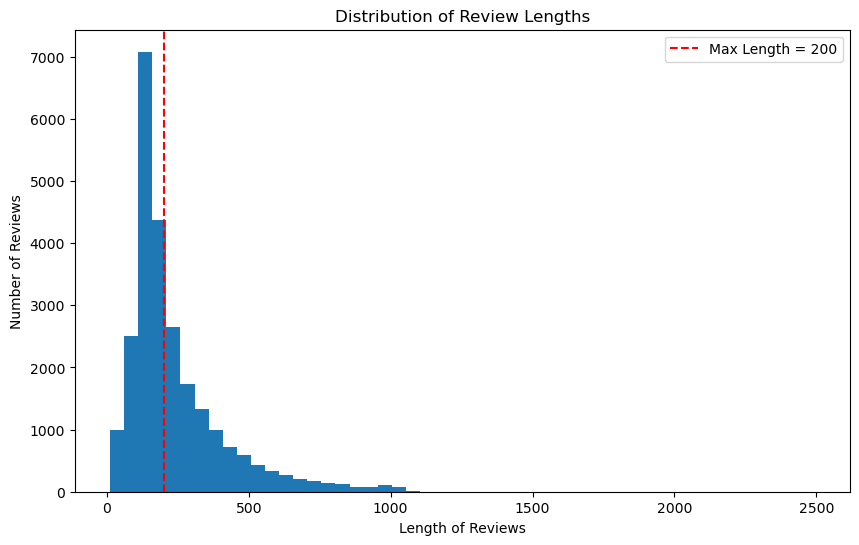

In [75]:
# Analyze review lengths
train_lens = [len(x) for x in imdb.load_data(num_words=vocab_size)[0][0]]
plt.figure(figsize=(10, 6))
plt.hist(train_lens, bins=50)
plt.xlabel('Length of Reviews')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Review Lengths')
plt.axvline(x=max_len, color='r', linestyle='--', label=f'Max Length = {max_len}')
plt.legend()
plt.show()

In [77]:
# Build the model
print("\nBuilding the model...")
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_len),
    GlobalAveragePooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])


Building the model...


C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [79]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [81]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [83]:
# Train the model
print("\nTraining the model...")
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)


Training the model...
Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5923 - loss: 0.6614 - val_accuracy: 0.8406 - val_loss: 0.3643
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8458 - loss: 0.3584 - val_accuracy: 0.8782 - val_loss: 0.3008
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8869 - loss: 0.2790 - val_accuracy: 0.8796 - val_loss: 0.2946
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9131 - loss: 0.2242 - val_accuracy: 0.8780 - val_loss: 0.3103
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9322 - loss: 0.1869 - val_accuracy: 0.8764 - val_loss: 0.3218
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9460 - loss: 0.1627 - val_accuracy: 0.8586 - val_loss: 0.3682
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9528 - loss: 0.1432 - val_accuracy: 0.8678 - val_loss: 0.3943
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9585 - loss: 0

In [85]:
# Evaluate the model
print("\nEvaluating the model...")
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


Evaluating the model...
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8528 - loss: 0.6331
Test Accuracy: 0.8490


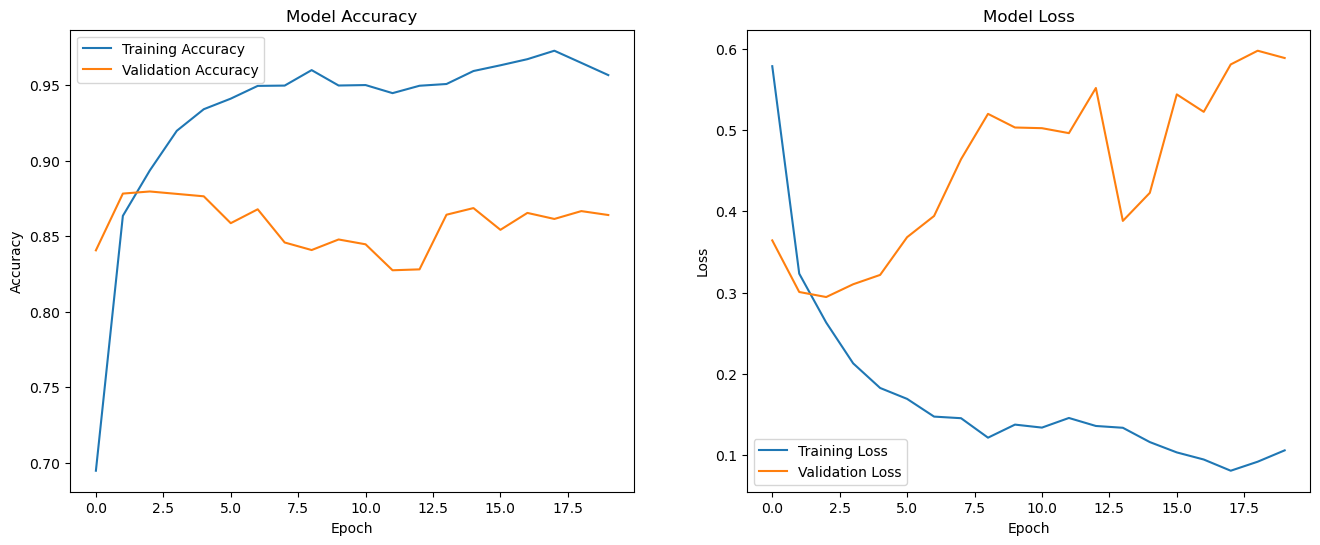

In [87]:
# Plot training history
plt.figure(figsize=(16, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

In [89]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [91]:
# Generate predictions and create confusion matrix
y_pred = (model.predict(x_test) > 0.5).astype(int).flatten()
cm = confusion_matrix(y_test, y_pred)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


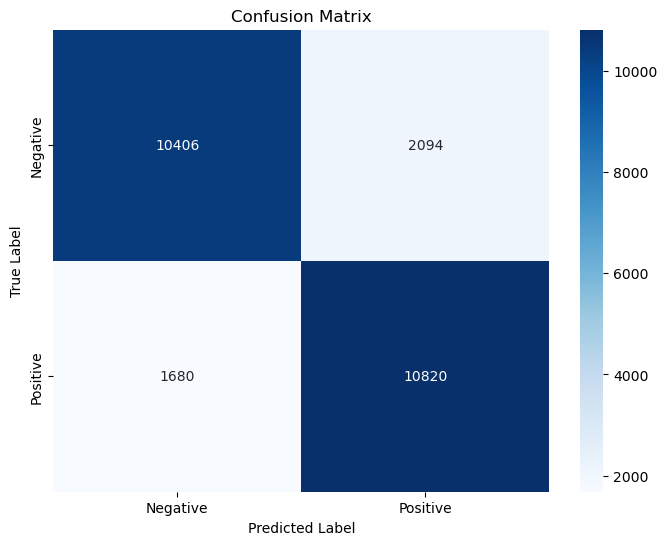

In [93]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [95]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


Classification Report:
              precision    recall  f1-score   support

    Negative       0.86      0.83      0.85     12500
    Positive       0.84      0.87      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



In [97]:
# Function to predict sentiment of new reviews
def predict_sentiment(review_text):
    # Tokenize and convert to sequence
    word_index = imdb.get_word_index()
    # Start indices from 3 because 0,1,2 are reserved indices
    words = review_text.lower().split()
    review_seq = [word_index.get(word, 0) + 3 for word in words]
    # Filter to remove words not in vocab
    review_seq = [i for i in review_seq if i < vocab_size]
    # Pad sequence
    padded_seq = pad_sequences([review_seq], maxlen=max_len)
    # Make prediction
    score = model.predict(padded_seq)[0][0]
    return {
        'score': float(score),
        'sentiment': 'Positive' if score > 0.5 else 'Negative'
    }

In [99]:
# Try with some example reviews
example_reviews = [
    "This movie was excellent! The acting was incredible and the plot was fascinating.",
    "What a terrible waste of time. The acting was wooden and the plot made no sense."
]

In [101]:
print("\nTesting with example reviews:")
for review in example_reviews:
    result = predict_sentiment(review)
    print(f"\nReview: {review}")
    print(f"Sentiment: {result['sentiment']} (Score: {result['score']:.4f})")


Testing with example reviews:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step

Review: This movie was excellent! The acting was incredible and the plot was fascinating.
Sentiment: Positive (Score: 0.8663)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step

Review: What a terrible waste of time. The acting was wooden and the plot made no sense.
Sentiment: Negative (Score: 0.1392)


In [103]:
# Save the model
model.save('imdb_sentiment_model.h5')
print("\nModel saved as 'imdb_sentiment_model.h5'")


Model saved as 'imdb_sentiment_model.h5'
